In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_excel("Clean genomic dataset.xlsx")
df.tail(5)

,Virus name,Virus family,DNA(0)/RNA(1),Virus genus,Average genome length (Nucleotides),Replication in the cytoplasm (True:1),Vector-borne or not (True:1),enveloped/non-enveloped (True:1),vSegmentedTF (True:1),Zoonotic or not (True:1)
540,Zaire_ebolavirus,Filoviridae,1,Ebolavirus,18898,1,0,0,0,1
541,Zika_virus,Flaviviridae,1,Flavivirus,10794,1,1,0,0,1
542,Sars-cov-2,Coronaviridae,1,Betacoronavirus,29811,1,0,0,0,1
543,H1N1,Orthomyxovirida,1,Alphainfluenzavirus,2341,1,0,1,1,1
544,Mers-Cov,Coronaviridae,1,Betacoronavirus,30000,1,0,1,0,1


In [ ]:
df.dtypes

Virus name                               object
Virus family                             object
DNA(0)/RNA(1)                             int64
Virus genus                              object
Average genome length (Nucleotides)       int64
Replication in the cytoplasm (True:1)     int64
Vector-borne or not (True:1)              int64
enveloped/non-enveloped (True:1)          int64
vSegmentedTF (True:1)                     int64
Zoonotic or not (True:1)                  int64
dtype: object

In [ ]:
df.describe()

,DNA(0)/RNA(1),Average genome length (Nucleotides),Replication in the cytoplasm (True:1),Vector-borne or not (True:1),enveloped/non-enveloped (True:1),vSegmentedTF (True:1),Zoonotic or not (True:1)
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.664220,38372.788991,0.667890,0.291743,0.291743,0.247706,0.332110
std,0.472696,57225.104874,0.471403,0.454982,0.454982,0.432077,0.471403
min,0.000000,1682.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9399.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,12062.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,26000.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,241087.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data['Virus family'] = LabelEncoder().fit_transform(data['Virus family'])
X = data[['Virus family','vSegmentedTF (True:1)', 'Vector-borne or not (True:1)', 'enveloped/non-enveloped (True:1)', 
          'DNA(0)/RNA(1)', 'Replication in the cytoplasm (True:1)','Average genome length (Nucleotides)']].values

In [ ]:
from sklearn import preprocessing
#normalize data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.42843054, -0.57381904,  1.55809915, -0.64180768,  0.71100272,
         0.7051615 , -0.41533527],
       [ 0.88096595, -0.57381904, -0.64180768,  1.55809915, -1.40646439,
         0.7051615 , -0.57899763],
       [ 1.29156439, -0.57381904, -0.64180768, -0.64180768,  0.71100272,
        -1.41811485, -0.44185147],
       [ 1.15469824,  1.74270968,  1.55809915,  1.55809915,  0.71100272,
         0.7051615 , -0.33534937],
       [-1.44575855, -0.57381904,  1.55809915, -0.64180768, -1.40646439,
         0.7051615 ,  2.30404522]])

In [ ]:
from sklearn.cluster import KMeans 
cost=[]
K=range(1,15)
for k in K: 
  k_means=KMeans(init = "k-means++",n_clusters = k, n_init = 12)
  k_means.fit(X)
  cost.append(k_means.inertia_)


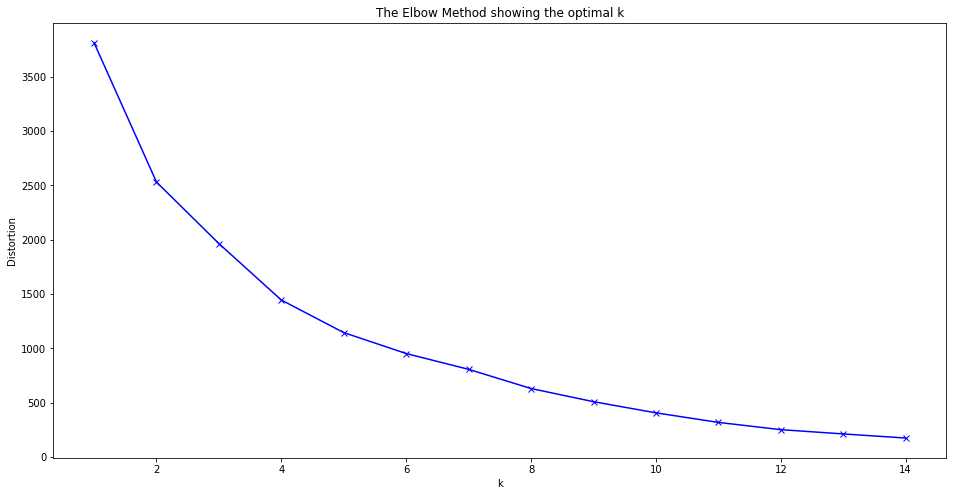

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

plt.figure(figsize=(16,8))
plt.plot(K, cost, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
k_means = KMeans(init = "k-means++",n_clusters = 2 , n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels[0:20])

[1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0]


In [ ]:
df["LOW RISK(0)/HIGH RISK(1)"] = labels
df.head(20)

,Virus name,Virus family,DNA(0)/RNA(1),Virus genus,Average genome length (Nucleotides),Replication in the cytoplasm (True:1),Vector-borne or not (True:1),enveloped/non-enveloped (True:1),vSegmentedTF (True:1),Zoonotic or not (True:1),LOW RISK(0)/HIGH RISK(1)
0,Adelaide_River_virus,Rhabdoviridae,1,Ephemerovirus,14627,1,1,0,0,0,1
1,African_green_monkey_polyomavirus,Polyomaviridae,0,Polyomavirus,5270,1,0,1,0,1,0
2,African_green_monkey_simian_foamy_virus,Retroviridae,1,Spumavirus,13111,0,0,0,0,0,0
3,African_horse_sickness_virus,Reoviridae,1,Orbivirus,19200,1,1,1,1,0,1
4,African_swine_fever_virus,Asfarviridae,0,Asfivirus,170101,1,1,0,0,0,0
5,Aichi_virus,Picornaviridae,1,Kobuvirus,8262,1,0,1,0,0,1
6,Akabane_virus,Bunyaviridae,1,Orthobunyavirus,12035,1,1,0,1,0,1
7,Alcelaphine_herpesvirus_1,Herpesviridae,0,Rhadinovirus,130608,0,0,0,0,0,0
8,Alcelaphine_herpesvirus_2,Herpesviridae,0,Rhadinovirus,135000,0,0,0,0,0,0
9,Allpaahuayo_virus,Arenaviridae,1,Arenavirus,10435,1,0,0,1,0,1


In [ ]:
df.groupby('LOW RISK(0)/HIGH RISK(1)').mean()

,DNA(0)/RNA(1),Average genome length (Nucleotides),Replication in the cytoplasm (True:1),Vector-borne or not (True:1),enveloped/non-enveloped (True:1),vSegmentedTF (True:1),Zoonotic or not (True:1)
LOW RISK(0)/HIGH RISK(1),,,,,,,
0,0.136792,77755.386792,0.160377,0.009434,0.400943,0.000000,0.146226
1,1.000000,13300.384384,0.990991,0.471471,0.222222,0.405405,0.450450


<h1 align=center><font size="4"> The following are the two(2) classes of viruses </font></h1>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
            <li><a href="#load_dataset">0-DNA viruses with low chance of cytoplasmic replication and higher genome length (LOW RISK)</a></li>
        <li><a href="#evaluation">1-RNA viruses with high chance of cytoplasmic replication and lower genome length (HIGH RISK)</a></li>
   


In [ ]:
df.to_excel("Final dataset.xlsx")